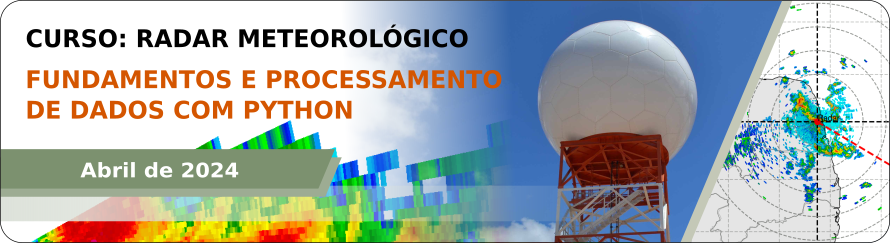

#`Tarefa 1 - 22/04/2024:` Conhecendo os dados dos radares do CEMADEN

- Este Colab contém as tarefas referentes ao primeiro dia do curso - 22/04/2024.

- Todas as instruções e scripts são processados diretamente na nuvem, não sendo necessário instalar ferramentas ou fazer o download dos dados localmente no seu computador. Para rodar as células de código, click no ícone de `play` no lado esquerdo superior ou digite `ctrl enter` no seu teclado.

---

**OBJETIVO:** Aplicar os conceitos aprendidos na parte prática do curso sobre os dados fornecidos por um radar meteorológico e a estratégia de varredura.


---


**DADOS:** Usaremos os dados volumétricos (ou seja, contendo todos os Plan Position Indicator-PPIs) da refletividade corrigida (dBZ) do radar de Jaraguari (MS) pertencente ao CEMADEN. No script existe um passo-a-passo explicando como baixar os dados volumétricos do radar no [site do CEMADEN](http://www2.cemaden.gov.br/mapainterativo/).

---

**PROCEDIMENTO REALIZADO NESTE SCRIPT:** Os seguintes procedimentos serão realizados nesta tarefa:
1. 1° Passo: Instalação das bibliotecas
2. 2° Passo: Importando as bibliotecas
3. 3° Passo: Baixar os dados do radar do CEMADEN
4. **EXERCÍCIO A)** - Conhecendo as informações contidas nos dados do radar de Jaraguari (MS)
5. **EXERCÍCIO B)** - Analisando a estratégia de varredura do radar de Jaraguari (MS)
---

**PASSO-A-PASSO PARA REALIZAÇÃO DA ATIVIDADE**:

1.   Processar os Passos 1 e 2 do script.
2.   Baixar o arquivo volumétrico da refletividade corrigida de um horário do radar de Jaraguari (MS) como indicado no Passo 3.
3.   Realizar o Exercício A).
4.   Realizar o Exercício B).

---

**Equipe:**

Palestrantes/Tutores:

 - Enrique Vieira Mattos - UNIFEI: enrique@unifei.edu.br / https://github.com/evmpython
 - Thiago Souza Biscaro - INPE: thiago.biscaro@inpe.br / https://github.com/tsbiscaro

Colaboradores:
 - Diego Souza - INPE: diego.souza@inpe.br / https://github.com/diegormsouza
 - Flávio Augusto - UNIFEI: augustoflaviobob@gmail.com
---

# **1° Passo:** Instalando bibliotecas

Neste passo instalaremos as bibliotecas necessárias para a execução dos scripts. Basicamente, as bibliotecas terão a seguinte finalidade:

*   **cartopy:** Trabalhar com mapas geográficos
*   **pyart:** Leitura e exibição dos dados do radar
*   **wradlib:** Plotagem da estratégia de varredura do radar


O código abaixo instala o pacote condacolab e reinicia o ambiente automaticamente.

In [1]:
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/conda-forge/miniforge/releases/download/23.11.0-0/Mambaforge-23.11.0-0-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:18
🔁 Restarting kernel...


Após processar a célula de código anterior, aparecerá a mensagem abaixo. Essa mensagem é normal aparecer ao instalar o pacote condacolab, e não afeta o prosseguimento das execuções da célula. Assim, basta fechar o aviso e seguir para próxima célula do código.

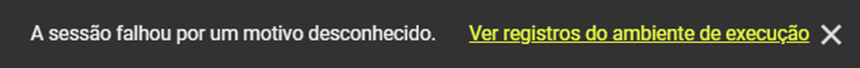

Instalação dos pacotes necessários.

In [1]:
!mamba install -q -c conda-forge cartopy==0.21.1 arm_pyart==1.16.0 wradlib

Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done


# **2° Passo:** Importando bibliotecas

Nesta etapa importaremos todas as bibliotecas necessárias para a nossa tarefa.

In [2]:
import pyart                      # Biblioteca para trabalhar com dados de radar
import wradlib as wrl             # Biblioteca para trabalhar com dados de radar
import matplotlib.pyplot as plt   # Biblioteca para gerar gráficos
import cartopy.crs as ccrs        # Biblioteca para trabalhar com projeções de mapas
from netCDF4 import num2date      # Biblioteca para trabalhar com datas
import numpy as np                # Biblioteca para trabalhar com matrizes

# ignora avisos
import warnings
warnings.filterwarnings("ignore")


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



Se a sessão do Colab reiniciar automaticamente após processar a célula de importação das bibliotecas, basta rodar o Passo 2 novamente, e seguir processando as demais células a seguir.

# **3° Passo:** Baixando os dados do radar do CEMADEN

Nesta etapa você deverá baixar o dado volumétrico de refletividade corrigida do radar de Jaraguari (MS) pertencente ao CEMADEN. Para isto, primeiramente você deverá acessar o [site](http://www2.cemaden.gov.br/mapainterativo/#) do CEMADEN e acessar a aba `Download de Dados` e em seguida clicar em `Radares`, como indicado na imagem a seguir:



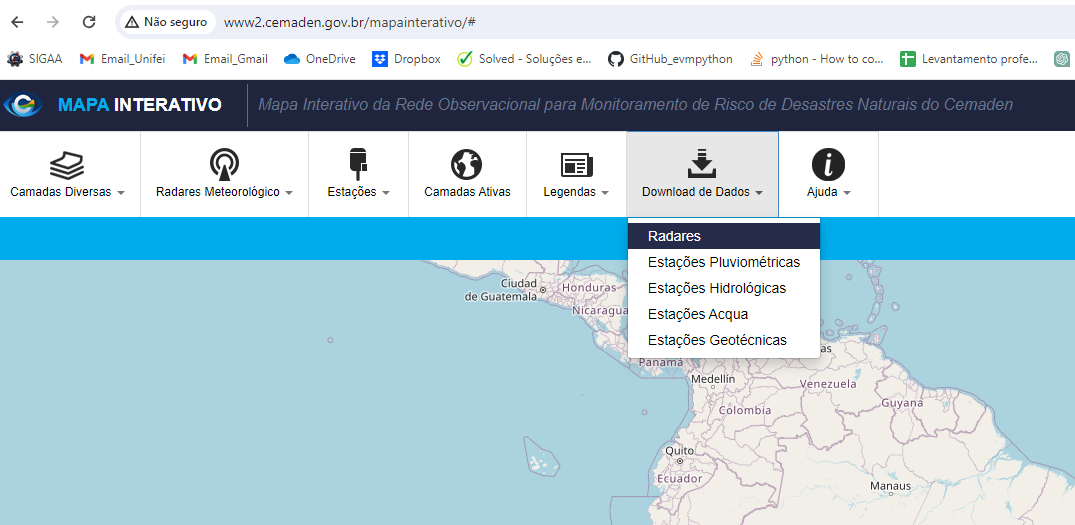

- Aparecerá uma lista com os nomes dos nove radares do CEMADEN. Em seguida você deverá acessar o link com o nome `2. jaraguari`, e clicar em `3. vol_250km_12steps.vol` e escolher o arquivo que contêm a refletividade corrigida, que esta com o final `dBZ.vol.h5`. No nosso exemplo abaixo, seria o arquivo `14. 2024021622300200dBZ.vol.h5`. Importante salientar que o CEMADEN atualmente disponíbiliza os dados de radar compreendendo o período da data atual até um mês atrás.

- Importante lembrar que não é necessário baixar especificamente o arquivo do radar com a data `2024021622300200dBZ.vol.h5`. Vocês poderão baixar o arquivo para qualquer data, porém o arquivo precisa conter a extensão `dBZ.vol.h5`.

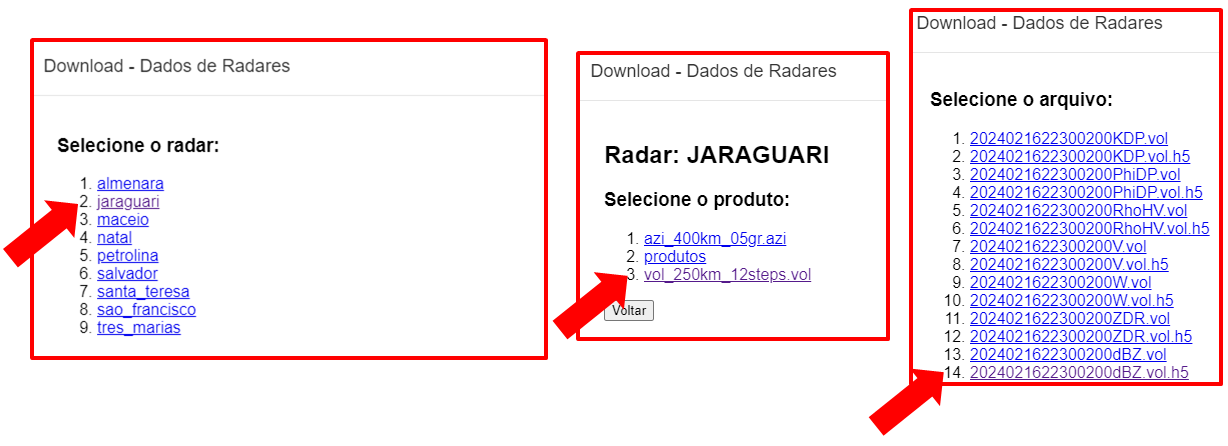

- Ao clicar no nome do arquivo, você deverá prencher o CAPTCHA e após esse procedimento o arquivo será baixado para o seu computador pessoal, no diretório de downloads.

- Após esse passo, você deverá fazer o upload do arquivo para a sua sesão do Colab. Para isto você deverá clicar na seta localizada na parte esquerda da sua tela do Colab, e em seguida escolher o arquivo que foi baixado na pasta downloads do seu computador, como indicado nas imagens a seguir:

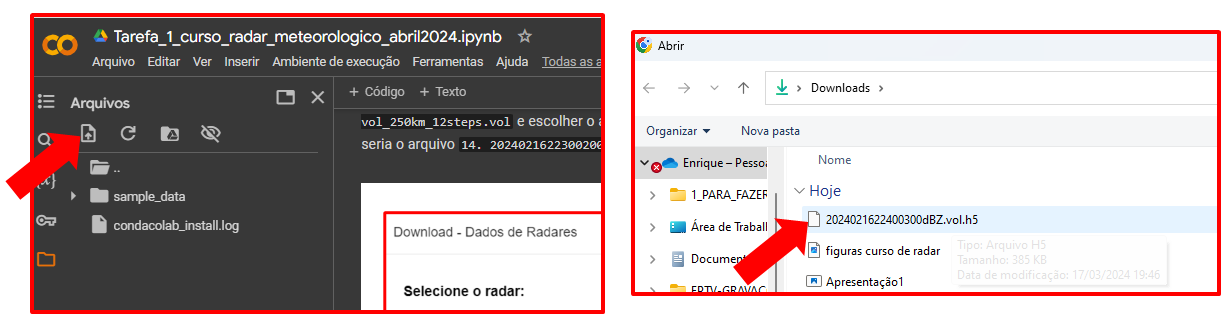

- Depois de fazer o upload do arquivo, veja que o arquivo ficará armazenado no `/content`, como indicado na imagem a seguir.

- Lembre-se que o  `/content` é a memória momentânea da sua sessão do Colab. O que significa que assim que você fechar a sua sessão do Colab, o arquivo irá ser excluído dessa sessão automaticamente.   

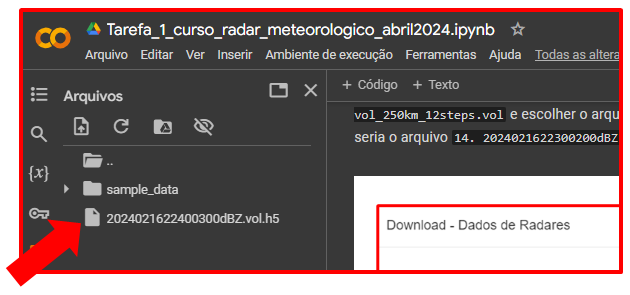

- Uma explicação detalhada dos tipos dos dados dos radares do CEMADEN e o que significa a nomenclatura dos arquivos podem ser acessado nesse [tutorial](https://github.com/evmpython/curso_radar_UNIFEI_INPE_2024/blob/main/doc/Acesso_a_Dados_CEMADEN_v2024-03-19.pdf) que preparamos.

- Agora já estamos com o arquivo volumétrico de refletividade corrigida do radar de Jaraguari (MS). Assim podemos começar a realizar a nossa Tarefa 1.





---


# **EXERCÍCIO A):** Conhecendo as Informações Contidas no Dado do Radar de Jaraguari (MS)


---


**ENUNCIADO:** O objetivo deste exercício é vocês conhecerem as informações contidas no arquivo do radar de Jaraguari (MS). Para isto vocês utilizarão como referência o `Script 01` da aula prática. Todas as informações importantes sobre a `Configuração do Radar` e a `Estratégia de Varredura` estão contidas dentro do arquivo do radar. Então para isto vocês precisam ler o dado do radar e exibir as informações solicitadas, que são:

1.   Campos do objeto *radar*
2.   Latitude do radar
3.   Longitude do radar
4.   Altitude do radar
5.   Data e horário do arquivo
6.   Data/Horário do início e fim do scan time do radar
7.   Quantidade de bins
8.   Resolução radial
9.  Quantidade total de azimutes
10.  Quantidade de azimutes por elevação
11.  Quantidade de elevações
12.  Valores dos ângulos de elevação


`Leitura` do dado do radar:

In [6]:
# nome do arquivo
filename = '2024032316300300dBZ.vol.h5'

# leitura do dado
radar = pyart.aux_io.read_odim_h5(f'/content/{filename}')

Investigando as informações do objeto "radar"

In [7]:
dir(radar)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_sweep_in_range',
 '_dic_info',
 'add_field',
 'add_field_like',
 'add_filter',
 'altitude',
 'altitude_agl',
 'antenna_transition',
 'azimuth',
 'check_field_exists',
 'drift',
 'elevation',
 'extract_sweeps',
 'fields',
 'fixed_angle',
 'gate_altitude',
 'gate_latitude',
 'gate_longitude',
 'gate_x',
 'gate_y',
 'gate_z',
 'georefs_applied',
 'get_azimuth',
 'get_elevation',
 'get_end',
 'get_field',
 'get_gate_area',
 'get_gate_lat_lon_alt',
 'get_gate_x_y_z',
 'get_nyquist_vel',
 'get_slice',
 'get_start',
 'get_start_end',
 'heading',
 'info',
 'init_gate_altitude',
 'init_gat

Utilizando as atribuições existentes dentro do objeto radar mostrado acima, mostre as informações solicitadas a seguir:

Exibindo os `campos do objeto radar`:

In [10]:
radar.fields.keys()

dict_keys(['reflectivity_horizontal'])

dict_keys(['reflectivity'])


Mostre o valor da `latitude` do radar:

In [12]:
radar.latitude

{'long_name': 'Latitude',
 'standard_name': 'Latitude',
 'units': 'degrees_north',
 'data': array([-20.27855])}

{'long_name': 'Latitude',
 'standard_name': 'Latitude',
 'units': 'degrees_north',
 'data': array([-20.27855])}

Mostre o valor da `longitude` do radar:

In [13]:
radar.longitude

{'long_name': 'Longitude',
 'standard_name': 'Longitude',
 'units': 'degrees_east',
 'data': array([-54.47396])}

{'long_name': 'Longitude',
 'standard_name': 'Longitude',
 'units': 'degrees_east',
 'data': array([-54.47396])}

Mostre o valor da `altitude` do radar:

In [14]:
radar.altitude

{'long_name': 'Altitude',
 'standard_name': 'Altitude',
 'units': 'meters',
 'positive': 'up',
 'data': array([753.])}

{'long_name': 'Altitude',
 'standard_name': 'Altitude',
 'units': 'meters',
 'positive': 'up',
 'data': array([753.])}

Mostre a `data e horário do arquivo do radar`:

In [15]:
radar.time

{'units': 'seconds since 2024-03-23T16:30:03Z',
 'standard_name': 'time',
 'long_name': 'time_in_seconds_since_volume_start',
 'calendar': 'gregorian',
 'comment': 'Coordinate variable for time. Time at the center of each ray, in fractional seconds since the global variable time_coverage_start',
 'data': array([  0.,   0.,   0., ..., 300., 300., 301.], dtype=float32)}

{'units': 'seconds since 2024-02-16T22:40:03Z',
 'standard_name': 'time',
 'long_name': 'time_in_seconds_since_volume_start',
 'calendar': 'gregorian',
 'comment': 'Coordinate variable for time. Time at the center of each ray, in fractional seconds since the global variable time_coverage_start',
 'data': array([  0.,   0.,   0., ..., 301., 301., 302.], dtype=float32)}

Mostre a `data/horário do início e fim` do scan do radar:

In [16]:
print('Início do volscan=', num2date(radar.time['data'][0], radar.time['units'] ))
print('Fim do volscan=', num2date(radar.time['data'][-1], radar.time['units'] ))

Início do volscan= 2024-03-23 16:30:03
Fim do volscan= 2024-03-23 16:35:04


Início do volcan= 2024-02-16 22:40:03
Fim do volcan= 2024-02-16 22:45:05


Mostre a quantidade de `bins`:

In [18]:
print(radar.nsweeps)

12


500

Mostre a `resolução radial`:

In [26]:
print(radar.range['meters_between_gates'])

500.0


500.0

Mostre a quantidade total de `azimutes`:

In [27]:
len(radar.azimuth['data'])

4320

In [32]:
print(radar.azimuth['data'].shape[0])

4320


Mostre a `quantidade de azimutes para cada elevação`:

In [33]:
# verificando o número de azimutes para cada elevação
nsweeps = radar.nsweeps
total_azimuths = radar.azimuth['data'].shape[0]
index_azimuths = radar.sweep_start_ray_index['data'].tolist()
index_azimuths.append(total_azimuths)

for i in range(nsweeps):
  print('Numero de azimutes da elevacao ' + str(i) + ': ' + str(index_azimuths[i+1] - index_azimuths[i]))

Numero de azimutes da elevacao 0: 360
Numero de azimutes da elevacao 1: 360
Numero de azimutes da elevacao 2: 360
Numero de azimutes da elevacao 3: 360
Numero de azimutes da elevacao 4: 360
Numero de azimutes da elevacao 5: 360
Numero de azimutes da elevacao 6: 360
Numero de azimutes da elevacao 7: 360
Numero de azimutes da elevacao 8: 360
Numero de azimutes da elevacao 9: 360
Numero de azimutes da elevacao 10: 360
Numero de azimutes da elevacao 11: 360


Numero de azimutes da elevacao 0: 360
Numero de azimutes da elevacao 1: 360
Numero de azimutes da elevacao 2: 360
Numero de azimutes da elevacao 3: 360
Numero de azimutes da elevacao 4: 360
Numero de azimutes da elevacao 5: 360
Numero de azimutes da elevacao 6: 360
Numero de azimutes da elevacao 7: 360
Numero de azimutes da elevacao 8: 360
Numero de azimutes da elevacao 9: 360
Numero de azimutes da elevacao 10: 360
Numero de azimutes da elevacao 11: 360


Mostre a quantidade de `elevações` e seus `valores`:

In [37]:
print(nsweeps)

12


12

In [39]:
radar.azimuth

{'units': 'degrees',
 'standard_name': 'beam_azimuth_angle',
 'long_name': 'azimuth_angle_from_true_north',
 'axis': 'radial_azimuth_coordinate',
 'comment': 'Azimuth of antenna relative to true north',
 'data': array([  0.5,   1.5,   2.5, ..., 357.5, 358.5, 359.5], dtype=float32)}

In [41]:
radar.fixed_angle["data"]

array([ 0.5,  1.2,  2. ,  2.9,  4. ,  5.3,  6.9,  8.7, 10.9, 13.4, 16.4,
       20. ], dtype=float32)

array([ 0.5,  1.2,  2. ,  2.9,  4. ,  5.3,  6.9,  8.7, 10.9, 13.4, 16.4,
       20. ], dtype=float32)

Mostre a `dimensão dos dados`:

In [47]:
print(radar.fields['reflectivity_horizontal']['data'].shape)

(4320, 500)


(4320, 500)

---


# **EXERCÍCIO B):** Plotando a Estratégia de Varredura do Radar de Jaraguari (MS)


---


**ENUNCIADO:** O objetivo deste exercício é vocês analisarem a estratégia de varredura do radar de Jaraguari (MS). Para isto vocês utilizarão como referência o `Script 02` da aula prática. Para realizar esse exercício vocês  deverão fazer o seguinte passo-a-passo:

1.   Leitura do arquivo do radar
2.   Atribuição dos parâmetros da varredura, que são:
     - quantidade total de bins do feixe: `ngates = radar.ngates`
     - resolução radial do feixe: `radial_resolution = radar.range['meters_between_gates']`
     - ângulos de elevação: `sweeps = list(radar.fixed_angle['data'])`
     - distância de cada bin ao radar em metros: `ranges = np.arange(ngates) * radial_resolution`
     - ângulo de abertura do feixe: `radar_beam_width = 0.996`
     - coordenadas do radar (longitude, latitude, altitude): `sitecoords = (lon_radar, lat_radar, alt_radar)`
     - resolução vertical: `vert_res = 1500.`
     - máxima altura: `maxalt = 16000.`
     - resolução horizontal em metros: `range_res = 20000.`
     - máxima distância: `maxrange = 200000.`
     - unidades: `units='km'`
3. Inserir o título da figura: `Estratégia de Varredura do Radar de Jaraguari (MS)`
4. Inserir o título do eixo X como `Distância (km) `.
5. Inserir o título do eixo Y como `Altura (km)`.
6. Mostrar a figura na tela.
7. Salvar a figura em PNG com 300 dpi de resolução e com o nome `Atividade_1_exercicio_a.png`.

In [ ]:
# nome do arquivo
filename = '2024032316300300dBZ.vol.h5'

# leitura do dado
radar = pyart.aux_io.read_odim_h5(f'/content/{filename}')

# distância de cada bin ao radar em metros
ranges = np.arange(ngates) * radial_resolution

# coordenadas do radar (longitude, latitude, altitude)
sitecoords = (lon_radar, lat_radar, alt_radar)

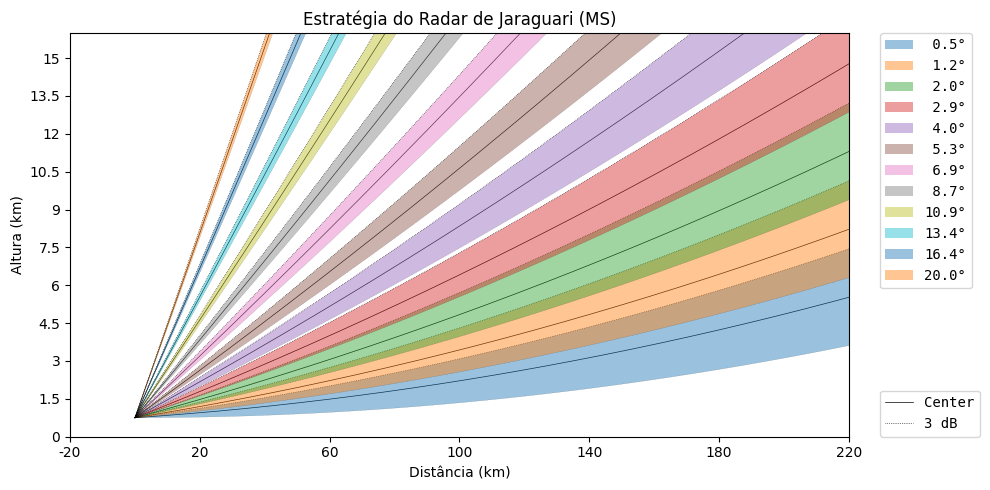

In [62]:
import numpy as np

#========================================================================================================================#
#                                             LEITURA DO DADO DE RADAR
#========================================================================================================================#
# leitura do arquivo
filename = '2024032316300300dBZ.vol.h5'
radar = pyart.aux_io.read_odim_h5(f'/content/{filename}')

# extrai a latitude, longitude e altura do radar
lat_radar, lon_radar, alt_radar = radar.latitude['data'][0], radar.longitude['data'][0], radar.altitude['data'][0]

#========================================================================================================================#
#                                            INFORMAÇÕES A SEREM UTILIZADAS
#========================================================================================================================#
# quantidade total de bins do feixe
ngates = radar.ngates

# resolução radial do feixe
radial_resolution = radar.range['meters_between_gates']

# ângulos de elevação
sweeps = list(radar.fixed_angle['data'])

# distância de cada bin ao radar em metros
ranges = np.arange(ngates) * radial_resolution

# ângulo de abertura do feixe
radar_beam_width = 0.996

# coordenadas do radar (longitude, latitude, altitude)
sitecoords = (lon_radar, lat_radar, alt_radar)

#========================================================================================================================#
#                                                     PLOTA FIGURA
#========================================================================================================================#
# cria moldura da figura
fig, ax = plt.subplots(figsize=(10,5))

# define estilo do gráfico
plt.style.use('default')

# plota figura
wrl.vis.plot_scan_strategy(ranges,
                           sweeps,
                           sitecoords,
                           beamwidth=radar_beam_width,
                           vert_res = 1000.,
                           maxalt = 15000.,
                           range_res = 10000.,
                           maxrange = 250000.,
                           units='km',
                           #vert_res = ,
                           #maxalt = ,
                           #range_res = ,
                           #maxrange = ,
                           #units= ,
                           ax=ax)


# configuração do gráfico
ax.set_title('Estratégia do Radar de Jaraguari (MS)')
ax.set_xlabel('Distância (km)')
ax.set_ylabel('Altura (km)')
ax.set_xticks(np.arange(-20000,221000,40000))
ax.set_yticks(np.arange(0,16000,1500))
ax.set_xlim(-20000,220000)
ax.set_ylim(0,16000)
ax.grid()

# recorta figura
plt.tight_layout()

# salva figura
plt.savefig('Atividade_1_exercicio_a.png')

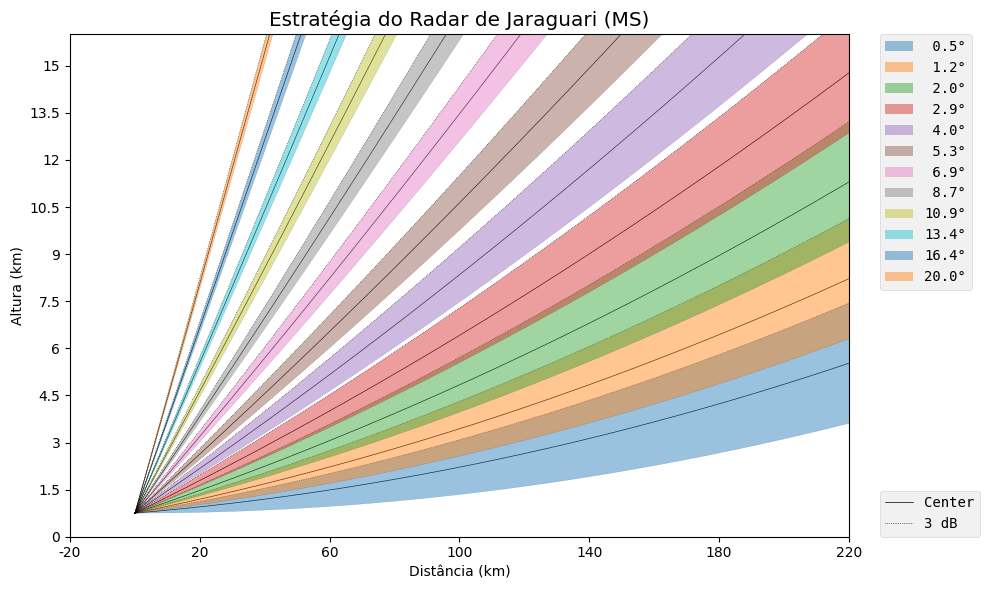